In [85]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import preprocessing  
import pickle
from sklearn.impute import SimpleImputer

# Preprocessing

#### Reading data and normalizing age column

In [86]:
with open("ml_project_dataset.pkl","rb") as fh:
    data=pickle.load(fh)
data['Age']=data['Age']/data['Age'].abs().max()# Normalize age.

In [87]:
data

,Age,Gender,Status,f1,f2,f3,f4,f5
0,0.341463,Female,Happy,"[-0.03723609, -0.020824267, -0.025246128, 0.00...","[-0.0013615170028060675, -0.000550377124454826...","[-0.045345112681388855, 0.049214184284210205, ...","[0.622996985912323, 0.5587776899337769, 0.2035...","[142.0, 268.0, -91.8211441040039, 147.0, 304.0..."
1,0.292683,Male,Sad,"[-0.009315872, -0.0008500488, 0.0008058883, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.22100389003753662, 0.0, 0.0, 0.070420034229...","[1302.0, 2091.0, -218.44000244140625, 928.0, 2..."
2,0.353659,M,neutral,"[-0.013662366, 0.03466877, -0.065040134, -0.04...","[-0.008576362393796444, 0.09807106107473373, -...","[-0.002319525694474578, 0.03656185418367386, -...","[0.0, 0.21522775292396545, 0.26262786984443665...","[831.0, 252.0, -65.05692291259766, 909.0, 516...."
3,0.341463,M,happy,"[-0.06278418, -0.03465886, -0.035757925, -0.02...","[0.03950166329741478, 0.1211700439453125, 0.03...","[-0.02030731551349163, 0.0438639298081398, -0....","[0.021185416728258133, 0.015900805592536926, 0...","[796.0, 715.0, -420.5904541015625, 850.0, 845...."
4,0.304878,Male,Normal,"[0.027600960806012154, 0.03169381991028786, -0...","[-0.012523038312792778, 0.1949128955602646, 0....","[-0.024486687034368515, 0.031889624893665314, ...","[0.36306896805763245, 0.45892614126205444, 0.1...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...,...,...,...,...
2600,0.256098,Female,Neutral,"[-0.08245806396007538, 0.004096889868378639, 0...","[-0.00660118879750371, 0.016428500413894653, 0...","[-0.040763456374406815, 0.0548965260386467, -0...","[0.2818586230278015, 0.0, 0.1590728461742401, ...","[189.0, 377.0, -213.5455780029297, 211.0, 463...."
2601,0.292683,Female,Happy,"[-0.024614291, 0.0066937124, 0.030145485, -0.0...","[0.0009541047620587051, 0.1416327953338623, 0....","[-0.06006622314453125, 0.045196782797575, -0.1...","[0.0, 0.04338845983147621, 0.01060467213392257...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2602,0.146341,Female,Happy,"[-0.03445599973201752, -0.0030360377859324217,...","[-0.011861197650432587, 0.28009411692619324, 0...","[-0.035674870014190674, 0.06552769988775253, -...","[0.5378477573394775, 0.0, 0.39331185817718506,...","[154.0, 310.0, -205.8900146484375, 154.0, 354...."
2603,0.304878,male,happy,"[-0.02918069, 0.032438118, 0.012860616, -0.045...","[0.018076958134770393, 0.13615529239177704, 0....","[-0.04480195418000221, 0.06002373620867729, -0...","[0.0, 0.25327205657958984, 0.14244912564754486...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


#### Count the totall number of nans inside each feature column(arbitrary)

In [88]:
def count_nan(data):
    for j in range(0,5):
        count=0
        for i in range(0,len(data)):
            count+=np.count_nonzero(np.isnan(data.iloc[i,j+3]))
        print(count)
        percentage=count/(len(data)*len(data.iloc[:,j+3][0]))*100
        print("percentage is :{}%".format(percentage))

In [89]:
count_nan(data)

162816
percentage is :12.207293666026871%
417792
percentage is :10.441458733205375%
626688
percentage is :10.441458733205375%
0
percentage is :0.0%
178908
percentage is :33.66602687140115%


#### Drop all the garbage value inside the Status column

In [90]:
def Final_Data(new_data):
    final_data=new_data
    for item in new_data.loc[:,"Status"]:
        if len(item)>=10:
            final_data=final_data.drop(new_data.loc[:,"Status"][new_data.loc[:,"Status"]==item].index[0])
    final_data=final_data.reset_index(drop=True)
    return final_data

In [91]:
final_data=Final_Data(data)

In [92]:
final_data

,Age,Gender,Status,f1,f2,f3,f4,f5
0,0.341463,Female,Happy,"[-0.03723609, -0.020824267, -0.025246128, 0.00...","[-0.0013615170028060675, -0.000550377124454826...","[-0.045345112681388855, 0.049214184284210205, ...","[0.622996985912323, 0.5587776899337769, 0.2035...","[142.0, 268.0, -91.8211441040039, 147.0, 304.0..."
1,0.292683,Male,Sad,"[-0.009315872, -0.0008500488, 0.0008058883, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.22100389003753662, 0.0, 0.0, 0.070420034229...","[1302.0, 2091.0, -218.44000244140625, 928.0, 2..."
2,0.353659,M,neutral,"[-0.013662366, 0.03466877, -0.065040134, -0.04...","[-0.008576362393796444, 0.09807106107473373, -...","[-0.002319525694474578, 0.03656185418367386, -...","[0.0, 0.21522775292396545, 0.26262786984443665...","[831.0, 252.0, -65.05692291259766, 909.0, 516...."
3,0.341463,M,happy,"[-0.06278418, -0.03465886, -0.035757925, -0.02...","[0.03950166329741478, 0.1211700439453125, 0.03...","[-0.02030731551349163, 0.0438639298081398, -0....","[0.021185416728258133, 0.015900805592536926, 0...","[796.0, 715.0, -420.5904541015625, 850.0, 845...."
4,0.304878,Male,Normal,"[0.027600960806012154, 0.03169381991028786, -0...","[-0.012523038312792778, 0.1949128955602646, 0....","[-0.024486687034368515, 0.031889624893665314, ...","[0.36306896805763245, 0.45892614126205444, 0.1...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...,...,...,...,...
2540,0.256098,Female,Neutral,"[-0.08245806396007538, 0.004096889868378639, 0...","[-0.00660118879750371, 0.016428500413894653, 0...","[-0.040763456374406815, 0.0548965260386467, -0...","[0.2818586230278015, 0.0, 0.1590728461742401, ...","[189.0, 377.0, -213.5455780029297, 211.0, 463...."
2541,0.292683,Female,Happy,"[-0.024614291, 0.0066937124, 0.030145485, -0.0...","[0.0009541047620587051, 0.1416327953338623, 0....","[-0.06006622314453125, 0.045196782797575, -0.1...","[0.0, 0.04338845983147621, 0.01060467213392257...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2542,0.146341,Female,Happy,"[-0.03445599973201752, -0.0030360377859324217,...","[-0.011861197650432587, 0.28009411692619324, 0...","[-0.035674870014190674, 0.06552769988775253, -...","[0.5378477573394775, 0.0, 0.39331185817718506,...","[154.0, 310.0, -205.8900146484375, 154.0, 354...."
2543,0.304878,male,happy,"[-0.02918069, 0.032438118, 0.012860616, -0.045...","[0.018076958134770393, 0.13615529239177704, 0....","[-0.04480195418000221, 0.06002373620867729, -0...","[0.0, 0.25327205657958984, 0.14244912564754486...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


#### Replacing Gender column with female&male and Status column with H,S,N

In [93]:
male = ['m','M' , 'male' , 'Male']
female = ['f','F' , 'female' , 'Female']
for i in range(len(final_data.iloc[:,1])):
    if  final_data.iloc[:,1][i] not in female:
        final_data.iloc[:,1][i] = 'male'
    else:
        final_data.iloc[:,1][i] = 'female'
H=['Happy','happy','H','happy ','h']
S=['Sad','S','s','sad']
N=['Normal','normal','Neutral','neutral','N','n','natural']
for i in range(len(final_data.iloc[:,2])):
    if  final_data.iloc[:,2][i]  in H:
        final_data.iloc[:,2][i] ='H'
    elif final_data.iloc[:,2][i]  in S:
         final_data.iloc[:,2][i] ='S'
    elif final_data.iloc[:,2][i]  in N:
         final_data.iloc[:,2][i] ='N'

    
final_data

,Age,Gender,Status,f1,f2,f3,f4,f5
0,0.341463,female,H,"[-0.03723609, -0.020824267, -0.025246128, 0.00...","[-0.0013615170028060675, -0.000550377124454826...","[-0.045345112681388855, 0.049214184284210205, ...","[0.622996985912323, 0.5587776899337769, 0.2035...","[142.0, 268.0, -91.8211441040039, 147.0, 304.0..."
1,0.292683,male,S,"[-0.009315872, -0.0008500488, 0.0008058883, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.22100389003753662, 0.0, 0.0, 0.070420034229...","[1302.0, 2091.0, -218.44000244140625, 928.0, 2..."
2,0.353659,male,N,"[-0.013662366, 0.03466877, -0.065040134, -0.04...","[-0.008576362393796444, 0.09807106107473373, -...","[-0.002319525694474578, 0.03656185418367386, -...","[0.0, 0.21522775292396545, 0.26262786984443665...","[831.0, 252.0, -65.05692291259766, 909.0, 516...."
3,0.341463,male,H,"[-0.06278418, -0.03465886, -0.035757925, -0.02...","[0.03950166329741478, 0.1211700439453125, 0.03...","[-0.02030731551349163, 0.0438639298081398, -0....","[0.021185416728258133, 0.015900805592536926, 0...","[796.0, 715.0, -420.5904541015625, 850.0, 845...."
4,0.304878,male,N,"[0.027600960806012154, 0.03169381991028786, -0...","[-0.012523038312792778, 0.1949128955602646, 0....","[-0.024486687034368515, 0.031889624893665314, ...","[0.36306896805763245, 0.45892614126205444, 0.1...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...,...,...,...,...
2540,0.256098,female,N,"[-0.08245806396007538, 0.004096889868378639, 0...","[-0.00660118879750371, 0.016428500413894653, 0...","[-0.040763456374406815, 0.0548965260386467, -0...","[0.2818586230278015, 0.0, 0.1590728461742401, ...","[189.0, 377.0, -213.5455780029297, 211.0, 463...."
2541,0.292683,female,H,"[-0.024614291, 0.0066937124, 0.030145485, -0.0...","[0.0009541047620587051, 0.1416327953338623, 0....","[-0.06006622314453125, 0.045196782797575, -0.1...","[0.0, 0.04338845983147621, 0.01060467213392257...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2542,0.146341,female,H,"[-0.03445599973201752, -0.0030360377859324217,...","[-0.011861197650432587, 0.28009411692619324, 0...","[-0.035674870014190674, 0.06552769988775253, -...","[0.5378477573394775, 0.0, 0.39331185817718506,...","[154.0, 310.0, -205.8900146484375, 154.0, 354...."
2543,0.304878,male,H,"[-0.02918069, 0.032438118, 0.012860616, -0.045...","[0.018076958134770393, 0.13615529239177704, 0....","[-0.04480195418000221, 0.06002373620867729, -0...","[0.0, 0.25327205657958984, 0.14244912564754486...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


#### Method1

In [94]:
def Seperate_feature(final_data):
    A=final_data.loc[:,'f1':'f5']
    B=[];
    for j in range(0,5):
        B.append(A.values[0][j])
        for i in range(1,len(final_data)):
            B[-1]=np.concatenate((B[-1],A.values[i][j]))
        B[-1]=B[-1].reshape((len(final_data),len(final_data.iloc[:,j+3][0])))
    return B

In [95]:
f_pre_normal=Seperate_feature(final_data)

In [12]:
f_pre_normal[0].shape

(2545, 512)

#### Method2(Arbitrary)(Deleting the columns of feature f1 to f5 which have the most nan and replace the other with mean)

In [13]:
f_pre_normal1=5*[0]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for j in range(0,5):
    Sel=[]
    for i in range(0,f_pre_normal[j].shape[1]):
        if np.count_nonzero(np.isnan(f_pre_normal[j][:,i]))/f_pre_normal[j].shape[0]*100 >=35 :
            Sel.append(i)
        else:
            continue
    #print(Sel)
    f_pre_normal1[j]=np.delete(f_pre_normal[j],Sel, 1)
    if(f_pre_normal1[j].shape[1]==0):
        print("All the feature was removed for f{}\n".format(j+1))
    else:
        imputer.fit(f_pre_normal1[j])
        f_pre_normal1[j]= imputer.transform(f_pre_normal1[j])
        print("{}\n".format(f_pre_normal1[j].shape))

(2545, 512)

(2545, 1536)

(2545, 2304)

(2545, 2560)

(2545, 204)



##### Replacing all the missing values with the mean

In [14]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for i in range(0,5):
    imputer.fit(f_pre_normal[i])
    f_pre_normal[i]= imputer.transform(f_pre_normal[i])

#### Seperating and Normalizing each feature to an array

In [15]:
def Norm_feature(f_pre_normal):
    min_max_scaler = preprocessing.MinMaxScaler()
    f=[]
    for i in range(0,5):
        x_scaled = min_max_scaler.fit_transform(f_pre_normal[i])
        df = pd.DataFrame(x_scaled)
        f.append(np.array(df))
    return f[0],f[1],f[2],f[3],f[4]

In [16]:
f=[f1,f2,f3,f4,f5]=Norm_feature(f_pre_normal)
f1

array([[0.34845785, 0.40683309, 0.42813586, ..., 0.47172808, 0.61954359,
        0.42608572],
       [0.45904946, 0.48317166, 0.53242294, ..., 0.61521981, 0.29058333,
        0.50131673],
       [0.44183305, 0.61891944, 0.26883916, ..., 0.45155225, 0.40483746,
        0.56974716],
       ...,
       [0.35946975, 0.47481713, 0.34968244, ..., 0.31863356, 0.47555463,
        1.        ],
       [0.38036518, 0.61039421, 0.5806784 , ..., 0.57341879, 0.4089739 ,
        0.70000882],
       [0.33682508, 0.35639512, 0.78658872, ..., 0.45246012, 0.58232768,
        0.27436671]])

#### PCA

In [17]:
feature=[]
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
for i in range(0,5):
    pca.fit(f[i])
    feature.append(pca.transform(f[i]))
    print(feature[-1].shape)

(2545, 41)
(2545, 107)
(2545, 105)
(2545, 28)
(2545, 5)


#### Reform a Dataframe from preprocessed data

In [39]:
df1 = pd.DataFrame({'f1':feature[0].tolist(),
                    'f2':feature[1].tolist(),
                    'f3':feature[2].tolist(),
                    'f4':feature[3].tolist(),
                    'f5':feature[4].tolist()})

In [40]:
df1

,f1,f2,f3,f4,f5
0,"[1.5139730377462801, -0.38880915185355314, -0....","[-0.8203519745280562, 0.6766649180543638, -3.5...","[-3.3777958898782323, -0.9289176841207827, 0.5...","[9.338490483226561, 4.117550078048082, -7.6396...","[-2.3837131483006533, -0.24726252558255027, -0..."
1,"[-1.101529305723576, 0.11425008926520057, 0.22...","[-2.951235612066293e-16, 1.6218297936593346e-1...","[1.4388757627620487e-15, 1.719907621110141e-15...","[4.097356367799953, 2.562822191392459, 0.05356...","[1.087462748329084, 1.745637159214143, 0.41342..."
2,"[-0.6444964345817535, -0.1957849842146449, 0.7...","[1.9503460744476335, 1.112059729700046, 0.9923...","[-1.723058417386161, 0.2545191784243884, 1.378...","[-2.220570822621327, 1.302511510934554, -2.714...","[-0.5095093346451517, -1.0742746452734466, 1.0..."
3,"[-1.3216497125728532, 0.9453343156378562, -0.4...","[1.7646392071187853, 3.8996810423197106, 0.315...","[-2.589513262646238, -0.489822075505996, -2.81...","[5.181065378445057, 1.6034155035025919, 1.3804...","[0.08274429752230542, -0.6843648817809336, -1...."
4,"[-0.8195113511104009, -0.8788833278601567, 1.3...","[-1.3737513358714426, 1.2701135860112887, 1.71...","[-3.4590853146075102, -1.9627932330217743, 0.4...","[8.680284484475262, -0.43043055064833263, -5.2...","[4.802936530027691e-15, -3.9062797930493246e-1..."
...,...,...,...,...,...
2540,"[0.6398808582356244, -0.09891274877623873, -1....","[-2.40917321464244, -0.5036276228005406, -1.88...","[-3.043310852775979, -3.23348453067071, 1.5020...","[-7.23605004758155, 2.600251869057823, -2.8590...","[-1.6267812946655988, -0.5860951346852761, -1...."
2541,"[0.6472653843329474, -0.35357018335515544, -1....","[-1.4491745711512123, -0.4380093220387501, -1....","[-2.7693218179498285, -0.5798880794483894, 0.5...","[2.7973212943461103, -5.659240120553168, 6.805...","[4.802936530027691e-15, -3.9062797930493246e-1..."
2542,"[1.023984323344387, -0.06774473397863301, -0.8...","[-1.5936315052703214, -1.2742369877883826, -1....","[0.4854768496159864, -0.8805517071607628, -1.4...","[2.331739865051341, 1.9356383322099553, 6.5800...","[-2.712657536055602, 0.6791862566836824, 0.202..."
2543,"[-1.6957331956164232, -0.8384148604708825, 0.7...","[1.3769093158982986, 3.5431657857677523, -0.06...","[0.12243548358090912, -0.9502409522391911, -1....","[-5.538704388710598, -5.664104928535973, 3.528...","[4.802936530027691e-15, -3.9062797930493246e-1..."


In [41]:
df2=final_data.loc[:,"Age":"Status"]

In [42]:
df_final=pd.concat([df2,df1],axis=1,join='inner')

In [43]:
df_final

,Age,Gender,Status,f1,f2,f3,f4,f5
0,0.341463,female,H,"[1.5139730377462801, -0.38880915185355314, -0....","[-0.8203519745280562, 0.6766649180543638, -3.5...","[-3.3777958898782323, -0.9289176841207827, 0.5...","[9.338490483226561, 4.117550078048082, -7.6396...","[-2.3837131483006533, -0.24726252558255027, -0..."
1,0.292683,male,S,"[-1.101529305723576, 0.11425008926520057, 0.22...","[-2.951235612066293e-16, 1.6218297936593346e-1...","[1.4388757627620487e-15, 1.719907621110141e-15...","[4.097356367799953, 2.562822191392459, 0.05356...","[1.087462748329084, 1.745637159214143, 0.41342..."
2,0.353659,male,N,"[-0.6444964345817535, -0.1957849842146449, 0.7...","[1.9503460744476335, 1.112059729700046, 0.9923...","[-1.723058417386161, 0.2545191784243884, 1.378...","[-2.220570822621327, 1.302511510934554, -2.714...","[-0.5095093346451517, -1.0742746452734466, 1.0..."
3,0.341463,male,H,"[-1.3216497125728532, 0.9453343156378562, -0.4...","[1.7646392071187853, 3.8996810423197106, 0.315...","[-2.589513262646238, -0.489822075505996, -2.81...","[5.181065378445057, 1.6034155035025919, 1.3804...","[0.08274429752230542, -0.6843648817809336, -1...."
4,0.304878,male,N,"[-0.8195113511104009, -0.8788833278601567, 1.3...","[-1.3737513358714426, 1.2701135860112887, 1.71...","[-3.4590853146075102, -1.9627932330217743, 0.4...","[8.680284484475262, -0.43043055064833263, -5.2...","[4.802936530027691e-15, -3.9062797930493246e-1..."
...,...,...,...,...,...,...,...,...
2540,0.256098,female,N,"[0.6398808582356244, -0.09891274877623873, -1....","[-2.40917321464244, -0.5036276228005406, -1.88...","[-3.043310852775979, -3.23348453067071, 1.5020...","[-7.23605004758155, 2.600251869057823, -2.8590...","[-1.6267812946655988, -0.5860951346852761, -1...."
2541,0.292683,female,H,"[0.6472653843329474, -0.35357018335515544, -1....","[-1.4491745711512123, -0.4380093220387501, -1....","[-2.7693218179498285, -0.5798880794483894, 0.5...","[2.7973212943461103, -5.659240120553168, 6.805...","[4.802936530027691e-15, -3.9062797930493246e-1..."
2542,0.146341,female,H,"[1.023984323344387, -0.06774473397863301, -0.8...","[-1.5936315052703214, -1.2742369877883826, -1....","[0.4854768496159864, -0.8805517071607628, -1.4...","[2.331739865051341, 1.9356383322099553, 6.5800...","[-2.712657536055602, 0.6791862566836824, 0.202..."
2543,0.304878,male,H,"[-1.6957331956164232, -0.8384148604708825, 0.7...","[1.3769093158982986, 3.5431657857677523, -0.06...","[0.12243548358090912, -0.9502409522391911, -1....","[-5.538704388710598, -5.664104928535973, 3.528...","[4.802936530027691e-15, -3.9062797930493246e-1..."


# Upsampeling

In [44]:
grouped = df_final.groupby(df_final.Gender)
df_majority = grouped.get_group('male')
df_minority = grouped.get_group('female')
# 1643 male  # 902 female
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority , replace= True , n_samples = 1643 , random_state = 123)
final_pd = pd.concat([df_majority , df_minority_upsampled])
grouped = final_pd.groupby(final_data.Gender)
df_majority = grouped.get_group('male')
df_minority = grouped.get_group('female')
# print(len(df_minority.iloc[:,1]))
# print(len(df_majority.iloc[:,1]))

#### Define final_pd after Upsampeling

In [45]:
final_pd=final_pd.reset_index(drop=True)
final_pd

,Age,Gender,Status,f1,f2,f3,f4,f5
0,0.292683,male,S,"[-1.101529305723576, 0.11425008926520057, 0.22...","[-2.951235612066293e-16, 1.6218297936593346e-1...","[1.4388757627620487e-15, 1.719907621110141e-15...","[4.097356367799953, 2.562822191392459, 0.05356...","[1.087462748329084, 1.745637159214143, 0.41342..."
1,0.353659,male,N,"[-0.6444964345817535, -0.1957849842146449, 0.7...","[1.9503460744476335, 1.112059729700046, 0.9923...","[-1.723058417386161, 0.2545191784243884, 1.378...","[-2.220570822621327, 1.302511510934554, -2.714...","[-0.5095093346451517, -1.0742746452734466, 1.0..."
2,0.341463,male,H,"[-1.3216497125728532, 0.9453343156378562, -0.4...","[1.7646392071187853, 3.8996810423197106, 0.315...","[-2.589513262646238, -0.489822075505996, -2.81...","[5.181065378445057, 1.6034155035025919, 1.3804...","[0.08274429752230542, -0.6843648817809336, -1...."
3,0.304878,male,N,"[-0.8195113511104009, -0.8788833278601567, 1.3...","[-1.3737513358714426, 1.2701135860112887, 1.71...","[-3.4590853146075102, -1.9627932330217743, 0.4...","[8.680284484475262, -0.43043055064833263, -5.2...","[4.802936530027691e-15, -3.9062797930493246e-1..."
4,0.317073,male,S,"[-1.545735784302495, -0.7487126266533096, -1.4...","[-0.09765269158712679, 2.807368083436627, 0.02...","[-1.402602810284998, -2.092340226822774, -1.77...","[4.777273517862466, 7.827865840420076, -3.3039...","[1.3690554513951168, -1.9113252808995873, 0.27..."
...,...,...,...,...,...,...,...,...
3281,0.304878,female,N,"[0.9523588122333954, -1.010676166028213, -0.03...","[-2.4792376830265512, -2.0013305325775637, 1.8...","[1.6682090626708628, -4.055493764479131, 1.584...","[-0.28911190797832415, 1.238076683781686, 7.85...","[-0.012948896518914187, 0.6820252428088829, -0..."
3282,0.170732,female,N,"[1.1340551575428057, 0.20590816743894766, -1.6...","[-1.9205688858378036, -1.47930459873495, -1.60...","[2.7625441357164218, -2.196309524198668, -2.89...","[6.9500215254927795, -4.620100331278616, -0.72...","[4.802936530027691e-15, -3.9062797930493246e-1..."
3283,0.304878,female,N,"[0.9523588122333954, -1.010676166028213, -0.03...","[-2.4792376830265512, -2.0013305325775637, 1.8...","[1.6682090626708628, -4.055493764479131, 1.584...","[-0.28911190797832415, 1.238076683781686, 7.85...","[-0.012948896518914187, 0.6820252428088829, -0..."
3284,0.609756,female,N,"[1.6480035705731777, -1.0226229680525, 1.59897...","[1.2376231683513674, -2.75459867901167, 0.7516...","[2.306943219813106, 3.2161770677136037, 1.5153...","[-11.925801331940553, -3.0081539452959607, -2....","[4.802936530027691e-15, -3.9062797930493246e-1..."


In [46]:
f_final=Seperate_feature(final_pd)
f_final[0]

array([[-1.10152931,  0.11425009,  0.22041418, ...,  0.39883129,
        -0.22870922, -0.05677065],
       [-0.64449643, -0.19578498,  0.71985806, ..., -0.47582947,
        -0.12199268, -0.09643269],
       [-1.32164971,  0.94533432, -0.44302079, ..., -0.13590666,
        -0.09211892,  0.31127021],
       ...,
       [ 0.95235881, -1.01067617, -0.03346107, ..., -0.35126558,
         0.29646932,  0.29991963],
       [ 1.64800357, -1.02262297,  1.59897388, ...,  0.70426994,
         0.03599885, -0.40422135],
       [ 0.8069332 , -1.10741343,  0.4829824 , ..., -0.23513043,
         0.1377186 , -0.45227421]])

# Feature set

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

### Evaluating feature's ranking By correlation

#### Convert the Gender column to binary format and Status column to one hot

In [48]:
df_final['Gender'] =df_final['Gender'].astype('category').cat.codes
status_column = df_final.iloc[:, 2:3].values
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
status_column = np.array(ct.fit_transform(status_column))
status_df = pd.DataFrame(status_column)
status_df.columns = ['H' , 'N' , 'S']
#df_final
status_df

,H,N,S
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
2540,0.0,1.0,0.0
2541,1.0,0.0,0.0
2542,1.0,0.0,0.0
2543,1.0,0.0,0.0


### Ranking f1 to f5 by finding the correlation between age & Gender lebels and feature [f1:f5]

In [49]:
labels = ['Gender' , 'Age']
column=['f1','f2','f3','f4','f5']
for label in labels:
    sum_more_than = {'f1':0 , 'f2':0 , 'f3':0 , 'f4':0 , 'f5':0}
    for i in range(5):
        df = pd.DataFrame(f_final[i])
        df=pd.concat([df,df_final[label]],axis=1,join='inner')
        corrmat = df.corr()
        label_row = corrmat[label]
        grater = label_row > 0
        sum_more_than[column[i]] = grater.sum()
    print(label , "ranking features ->")
    print(sorted(sum_more_than.items(), key=lambda x: x[1], reverse=True))

Gender ranking features ->
[('f2', 51), ('f3', 46), ('f1', 21), ('f4', 14), ('f5', 4)]
Age ranking features ->
[('f2', 63), ('f3', 53), ('f1', 20), ('f4', 19), ('f5', 4)]


### Ranking f1 to f5 by finding the correlation between Status lebel and feature [f1:f5]

In [50]:
sum_more_than = {'f1':0 , 'f2':0 , 'f3':0 , 'f4':0 , 'f5':0}
for status in status_df.columns:
    for i in range(5):
        df = pd.DataFrame(f_final[i])
        df=pd.concat([df,status_df[status]],axis=1,join='inner')
        corrmat = df.corr()
        label_row = corrmat[status]
        grater = label_row > 0
        sum_more_than[column[i]] += grater.sum()
for key in sum_more_than:    
    sum_more_than[key] *=  1/3
print("status ranking features -> ")
print(sorted(sum_more_than.items(), key=lambda x: x[1], reverse=True))

status ranking features -> 
[('f2', 57.666666666666664), ('f3', 54.666666666666664), ('f1', 19.333333333333332), ('f4', 13.333333333333332), ('f5', 3.333333333333333)]


###### Defining confusion matrix (arbitrary for next parts)

In [51]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# Clustering

In [55]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import f1_score

### Gender column

f1=> 0.8886774500475737


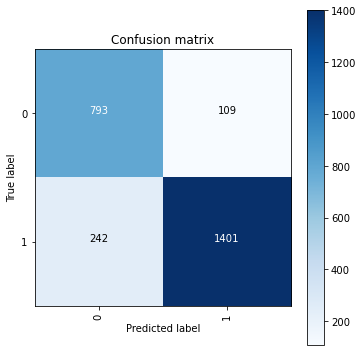

f2=> 0.6865231495134179


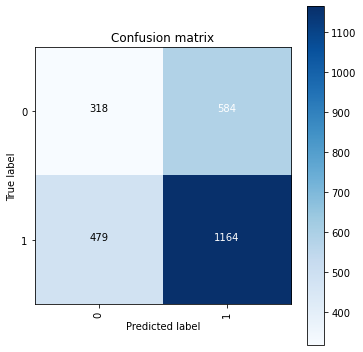

f3=> 0.7415730337078652


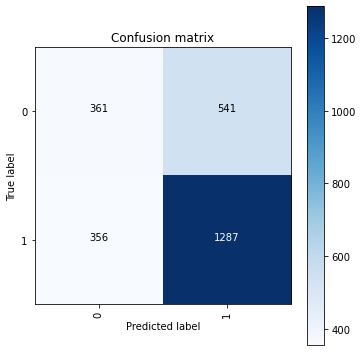

f4=> 0.5751416194601799


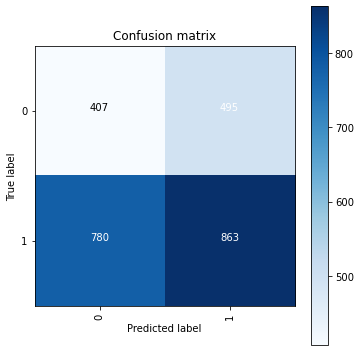

f5=> 0.6571985519353941


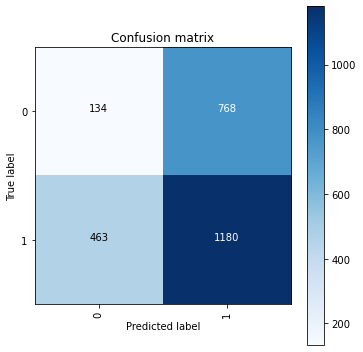

In [56]:
#0 -> female
#1 -> male

df_cluster=df_final.copy()
y_kmeans=[]
score=[]
df_cluster['Gender'] =df_cluster['Gender'].astype('category').cat.codes
for i in range(0,5):
    lst=[]
    score=[]
    kmeans= KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
    y_pred=kmeans.fit_predict(feature[i])
    lst.append(y_pred)
    score.append(f1_score(df_cluster['Gender'],y_pred, average='binary'))
    y_k_tilda=np.ones((feature[0].shape[0]))-y_pred
    lst.append(y_k_tilda)
    score.append(f1_score(df_cluster['Gender'],y_k_tilda, average='binary'))
    max_index=score.index(max(score))
    print("f{}=> {}".format(i+1,score[max_index]))
    classes = list(dict.fromkeys(df_final['Gender']))
    plot_confusion_matrix(confusion_matrix(df_cluster['Gender'],lst[max_index]),classes)
    #print("{}\n".format(confusion_matrix(df_cluster['Gender'],lst[max_index])))

### Status column

#### Considering all the 6 different conditions for the y_pred :
                                                            [0,1,2]
                                                            [0,2,1]
                                                            [1,2,0]
                                                            [1,0,2]
                                                            [2,0,1]
                                                            [2,1,0]

In [57]:
def Get_sequnece(y_pred):
    y_pred_2  = y_pred
    y_pred_3  = y_pred

    for i in range(len(y_pred)):
        y_pred_2 = np.where(y_pred == 0 , 3 , y_pred_2)
        y_pred_2 = np.where(y_pred == 1 , 0 , y_pred_2)
        y_pred_2 = np.where(y_pred_2 == 3 , 1 , y_pred_2)

        y_pred_3 = np.where(y_pred == 1 , 3 , y_pred_3)
        y_pred_3 = np.where(y_pred == 2 , 1 , y_pred_3)
        y_pred_3 = np.where(y_pred_3 == 3 , 2 , y_pred_3)

    y_pred_4 = y_pred_3
    y_pred_5 = y_pred_3
    for i in range(len(y_pred)):
        y_pred_4 = np.where(y_pred_3 == 0 , 3 , y_pred_4)
        y_pred_4 = np.where(y_pred_3 == 2 , 0 , y_pred_4)
        y_pred_4 = np.where(y_pred_4 == 3 , 2 , y_pred_4)

        y_pred_5 = np.where(y_pred_3 == 0 , 3 , y_pred_5)
        y_pred_5 = np.where(y_pred_3 == 1 , 0 , y_pred_5)
        y_pred_5 = np.where(y_pred_5 == 3 , 1 , y_pred_5)

    y_pred_6 = y_pred_5
    for i in range(len(y_pred)):

        y_pred_6 = np.where(y_pred_5 == 1 , 3 , y_pred_6)
        y_pred_6 = np.where(y_pred_5 == 2 , 1 , y_pred_6)
        y_pred_6 = np.where(y_pred_6 == 3 , 2 , y_pred_6)
    return y_pred,y_pred_2,y_pred_3,y_pred_4,y_pred_5,y_pred_6



### Considering two method for Clustering : Kmeans && Agglomerative

#### Kmeans

f1=> 0.3430255402750491


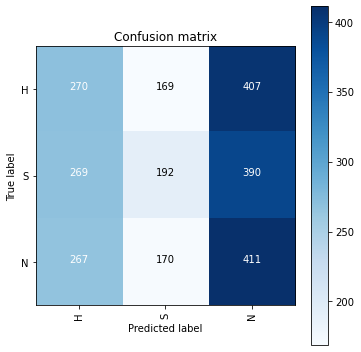

f2=> 0.3461689587426326


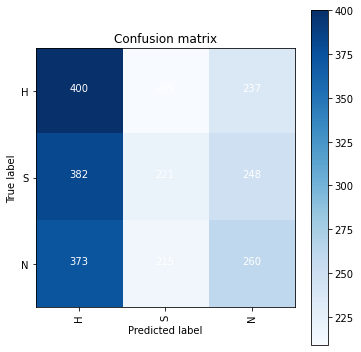

f3=> 0.3426326129666012


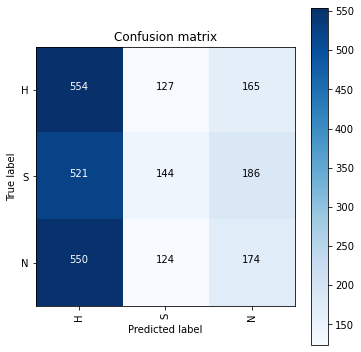

f4=> 0.35049115913555995


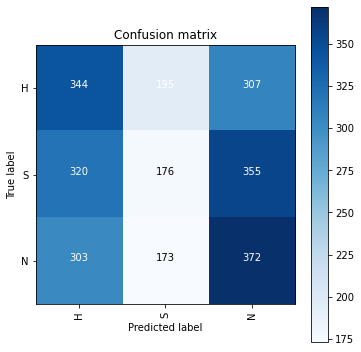

f5=> 0.3422396856581532


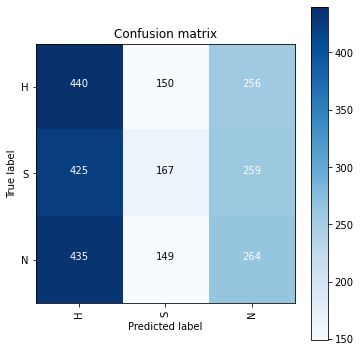

In [58]:
from sklearn.cluster import AgglomerativeClustering
for i in range(0,5):
    f_score = {'f1':0 , 'f2':0 , 'f3':0 , 'f4':0 , 'f5':0}
    y_pred_feature = {'f1':0 , 'f2':0 , 'f3':0 , 'f4':0 , 'f5':0}
    df_cluster['Status'] =df_cluster['Status'].astype('category').cat.codes
    kmeans= KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
    y_pred=kmeans.fit_predict(feature[i])
    y_sequnce=[y1,y2,y3,y4,y5,y6]=Get_sequnece(y_pred)
    score = []
    for j in range(6):
        score.append(f1_score(df_cluster["Status"],y_sequnce[j], average="micro"))
        max_index=score.index(max(score))
    y_pred_feature[column[i]] = y_sequnce[max_index]
    f_score[column[i]] = score[max_index]
    print("f{}=> {}".format(i+1,score[max_index]))
    classes = list(dict.fromkeys(df_final['Status']))
    plot_confusion_matrix(confusion_matrix(df_cluster['Status'],y_sequnce[max_index]),classes)


#### Agglomerative

f1=> 0.33909626719056973


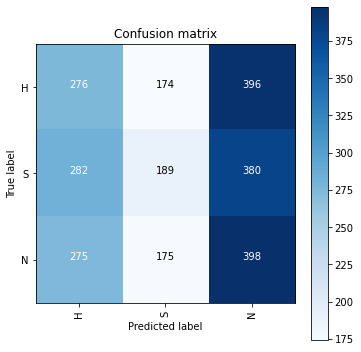

f2=> 0.33988212180746563


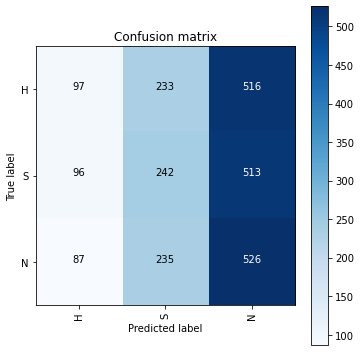

f3=> 0.3383104125736739


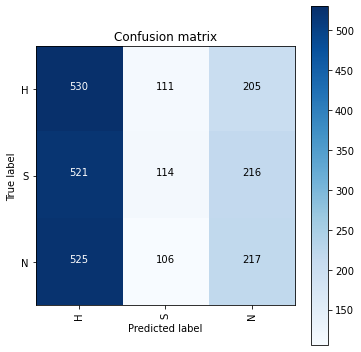

f4=> 0.35795677799607073


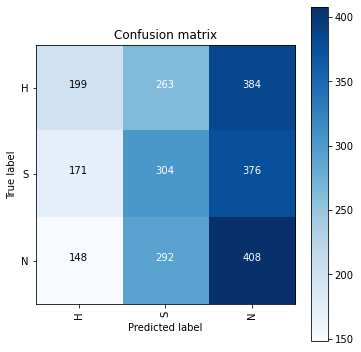

f5=> 0.3406679764243615


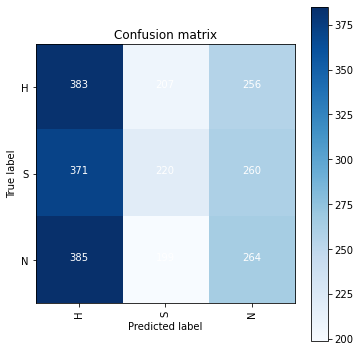

In [59]:

for i in range(0,5):
    f_score = {'f1':0 , 'f2':0 , 'f3':0 , 'f4':0 , 'f5':0}
    y_pred_feature = {'f1':0 , 'f2':0 , 'f3':0 , 'f4':0 , 'f5':0}
    hc = AgglomerativeClustering(n_clusters =3, affinity = 'euclidean', linkage = 'ward')
    y_pred = hc.fit_predict(feature[i])
    y_sequnce=[y1,y2,y3,y4,y5,y6]=Get_sequnece(y_pred)
    score = []
    for j in range(6):
        score.append(f1_score(df_cluster['Status'],y_sequnce[j], average='micro'))
    max_index=score.index(max(score))
    y_pred_feature[column[i]] = y_sequnce[max_index]
    f_score[column[i]] = score[max_index]
    print("f{}=> {}".format(i+1,score[max_index]))
    classes = list(dict.fromkeys(df_final['Status']))
    plot_confusion_matrix(confusion_matrix(df_cluster['Status'],y_sequnce[max_index]),classes)


### Clustering for n=5(5-angle of taken pictures)

In [60]:
kmeans= KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
for i in range(0,5):
    y_pred=kmeans.fit_predict(feature[i])
    print("prediction for y by f{} is:{}\n".format(i+1,y_pred))

prediction for y by f1 is:[2 4 4 ... 2 4 3]

prediction for y by f2 is:[0 1 2 ... 4 2 4]

prediction for y by f3 is:[3 0 0 ... 0 0 1]

prediction for y by f4 is:[2 2 0 ... 1 0 1]

prediction for y by f5 is:[2 1 0 ... 2 0 0]



### Clustering for n=6(Status & Gender columns)

In [61]:
kmeans= KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
for i in range(0,5):
    y_pred=kmeans.fit_predict(feature[i])
    print("prediction for y by f{} is:{}\n".format(i+1,y_pred))

prediction for y by f1 is:[0 1 5 ... 0 3 2]

prediction for y by f2 is:[2 4 1 ... 2 1 3]

prediction for y by f3 is:[0 2 2 ... 2 2 5]

prediction for y by f4 is:[1 3 3 ... 4 0 4]

prediction for y by f5 is:[1 5 0 ... 1 0 0]



### Ploting Sns and Histogram for Age,Status,Gender

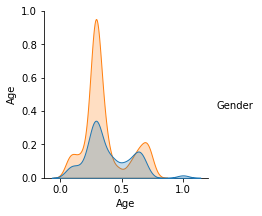

In [62]:
import seaborn as sns
frames=[df_cluster["Gender"],df_cluster["Age"]]
F=pd.concat(frames,axis=1)
sns.pairplot(F,hue='Gender',height=3)

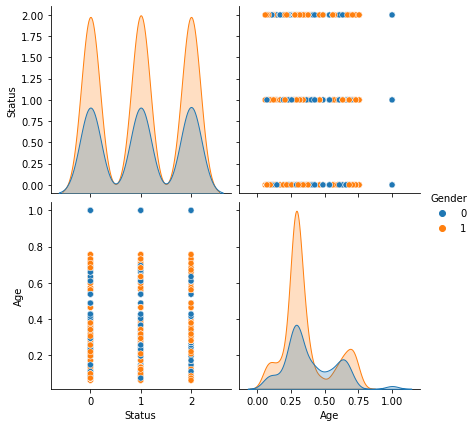

In [63]:
frames=[df_cluster["Status"],df_cluster["Gender"],df_cluster["Age"]]
F=pd.concat(frames,axis=1)
sns.pairplot(F,hue='Gender',height=3)

<AxesSubplot:>

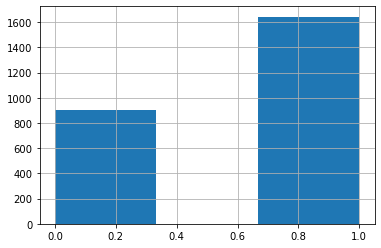

In [64]:
df_final.loc[:,"Gender"].hist(bins=3)

<AxesSubplot:>

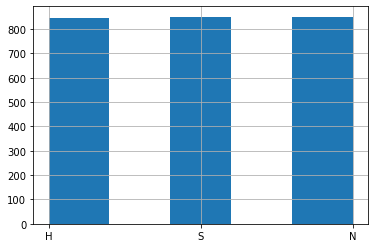

In [65]:
df_final.loc[:,"Status"].hist(bins=5)

# Classification

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

## Gender Label

### KNN( Estimating Gender column)

f1 => 
              precision    recall  f1-score   support

        male       0.83      0.96      0.89       404
      female       0.96      0.81      0.88       418

    accuracy                           0.88       822
   macro avg       0.89      0.89      0.88       822
weighted avg       0.89      0.88      0.88       822




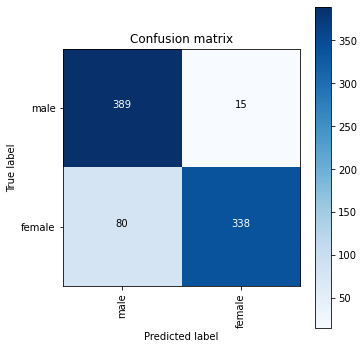

f2 => 
              precision    recall  f1-score   support

        male       0.93      0.91      0.92       404
      female       0.92      0.94      0.93       418

    accuracy                           0.92       822
   macro avg       0.92      0.92      0.92       822
weighted avg       0.92      0.92      0.92       822




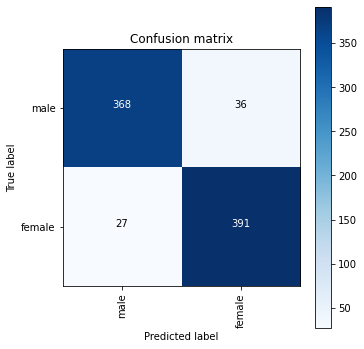

f3 => 
              precision    recall  f1-score   support

        male       0.93      0.91      0.92       404
      female       0.92      0.93      0.93       418

    accuracy                           0.92       822
   macro avg       0.92      0.92      0.92       822
weighted avg       0.92      0.92      0.92       822




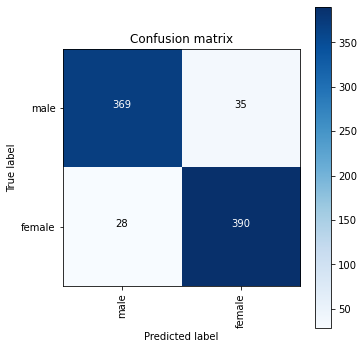

f4 => 
              precision    recall  f1-score   support

        male       0.66      0.78      0.71       404
      female       0.74      0.61      0.67       418

    accuracy                           0.69       822
   macro avg       0.70      0.69      0.69       822
weighted avg       0.70      0.69      0.69       822




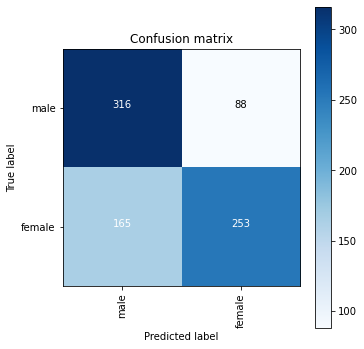

f5 => 
              precision    recall  f1-score   support

        male       0.69      0.43      0.53       404
      female       0.60      0.81      0.69       418

    accuracy                           0.63       822
   macro avg       0.64      0.62      0.61       822
weighted avg       0.64      0.63      0.61       822




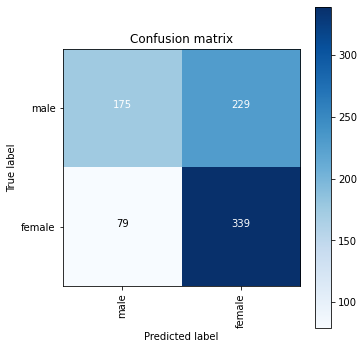

In [72]:
a1=[]
target_names = ['male', 'female']
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(f_final[i], final_pd.loc[:,"Gender"].values, test_size = 0.25, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    classes = list(dict.fromkeys(final_pd['Gender']))
    print("f{} => \n{}\n".format(i+1,classification_report(y_test, y_pred, target_names=target_names)))
    plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes)
    a1.append(accuracy_score(y_test, y_pred))
    


#### Final result

In [473]:
acc1 = pd.DataFrame({"column1": ["f1", "f2", "f3", "f4","f5"], "column2":a1 })
acc1.sort_values("column2",ascending=False)

,column1,column2
1,f2,0.923358
2,f3,0.923358
0,f1,0.884428
3,f4,0.692214
4,f5,0.625304


### Support_vector_Machine( Estimating Gender column)

f1 => 
              precision    recall  f1-score   support

        male       0.91      0.84      0.87       404
      female       0.86      0.92      0.89       418

    accuracy                           0.88       822
   macro avg       0.88      0.88      0.88       822
weighted avg       0.88      0.88      0.88       822




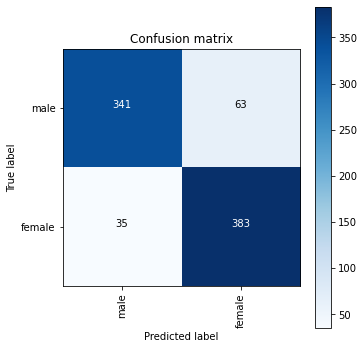

f2 => 
              precision    recall  f1-score   support

        male       0.94      0.92      0.93       404
      female       0.92      0.95      0.93       418

    accuracy                           0.93       822
   macro avg       0.93      0.93      0.93       822
weighted avg       0.93      0.93      0.93       822




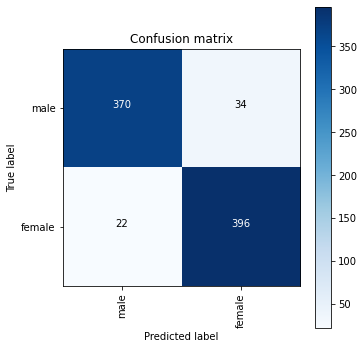

f3 => 
              precision    recall  f1-score   support

        male       0.95      0.93      0.94       404
      female       0.93      0.96      0.95       418

    accuracy                           0.94       822
   macro avg       0.94      0.94      0.94       822
weighted avg       0.94      0.94      0.94       822




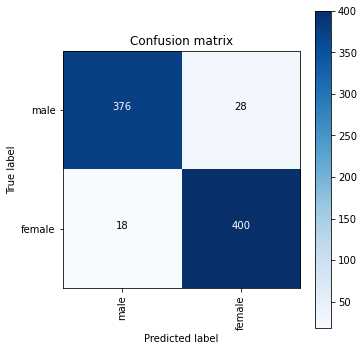

f4 => 
              precision    recall  f1-score   support

        male       0.60      0.65      0.62       404
      female       0.63      0.58      0.60       418

    accuracy                           0.61       822
   macro avg       0.61      0.61      0.61       822
weighted avg       0.61      0.61      0.61       822




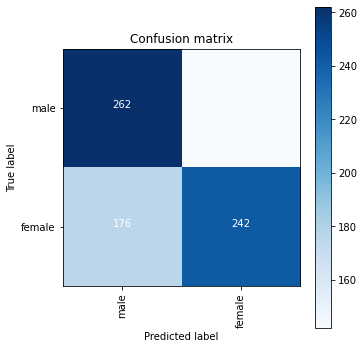

f5 => 
              precision    recall  f1-score   support

        male       0.56      0.91      0.70       404
      female       0.79      0.32      0.45       418

    accuracy                           0.61       822
   macro avg       0.67      0.61      0.57       822
weighted avg       0.68      0.61      0.57       822




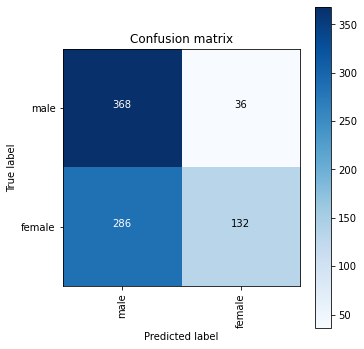

In [74]:
a2=[]
target_names = ['male', 'female']
classifier = SVC(kernel = 'linear', random_state = 0)
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(f_final[i], final_pd.loc[:,"Gender"].values, test_size = 0.25, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    classes = list(dict.fromkeys(final_pd['Gender']))
    print("f{} => \n{}\n".format(i+1,classification_report(y_test, y_pred, target_names=target_names)))
    plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes)
    a2.append(accuracy_score(y_test, y_pred))
 

#### Final result

In [475]:
acc2 = pd.DataFrame({"column1": ["f1", "f2", "f3", "f4","f5"], "column2":a2 })
acc2.sort_values("column2",ascending=False)

,column1,column2
2,f3,0.944039
1,f2,0.931873
0,f1,0.880779
3,f4,0.613139
4,f5,0.608273


### Kernel_Support_vector_Machine( Estimating Gender column)

f1 => 
              precision    recall  f1-score   support

        male       0.96      0.86      0.91       404
      female       0.88      0.96      0.92       418

    accuracy                           0.91       822
   macro avg       0.92      0.91      0.91       822
weighted avg       0.92      0.91      0.91       822




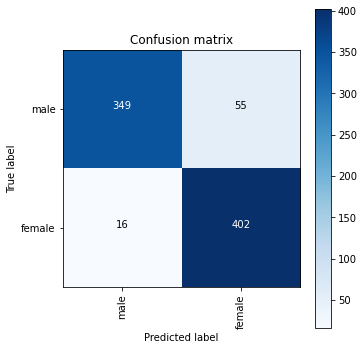

f2 => 
              precision    recall  f1-score   support

        male       0.95      0.93      0.94       404
      female       0.93      0.95      0.94       418

    accuracy                           0.94       822
   macro avg       0.94      0.94      0.94       822
weighted avg       0.94      0.94      0.94       822




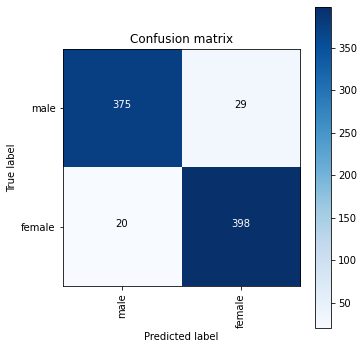

f3 => 
              precision    recall  f1-score   support

        male       0.95      0.94      0.94       404
      female       0.94      0.95      0.95       418

    accuracy                           0.95       822
   macro avg       0.95      0.95      0.95       822
weighted avg       0.95      0.95      0.95       822




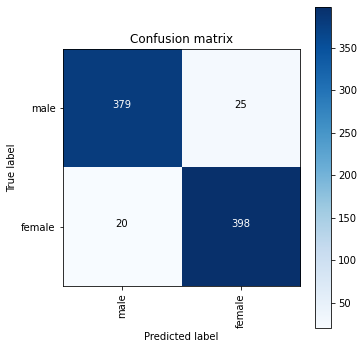

f4 => 
              precision    recall  f1-score   support

        male       0.70      0.73      0.72       404
      female       0.73      0.70      0.71       418

    accuracy                           0.71       822
   macro avg       0.71      0.71      0.71       822
weighted avg       0.71      0.71      0.71       822




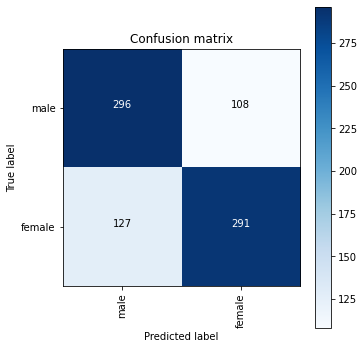

f5 => 
              precision    recall  f1-score   support

        male       0.59      0.86      0.70       404
      female       0.76      0.43      0.55       418

    accuracy                           0.64       822
   macro avg       0.68      0.65      0.63       822
weighted avg       0.68      0.64      0.63       822




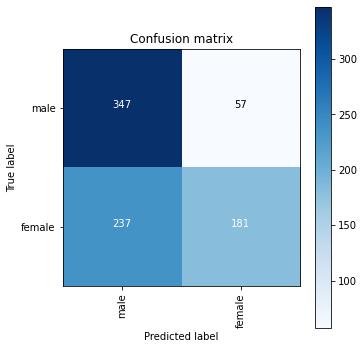

In [75]:
a3=[]
target_names = ['male', 'female']
classifier = SVC(kernel = 'rbf', random_state = 0)
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(f_final[i], final_pd.loc[:,"Gender"].values, test_size = 0.25, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predُict(X_test)
    classes = list(dict.fromkeys(final_pd['Gender']))
    print("f{} => \n{}\n".format(i+1,classification_report(y_test, y_pred, target_names=target_names)))
    plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes)
    a3.append(accuracy_score(y_test, y_pred))
    

#### Final result

In [477]:
acc3 = pd.DataFrame({"column1": ["f1", "f2", "f3", "f4","f5"], "column2":a3 })
acc3.sort_values("column2",ascending=False)

,column1,column2
2,f3,0.945255
1,f2,0.940389
0,f1,0.913625
3,f4,0.714112
4,f5,0.642336


### Naive Bayes(Estimating Gender column)

f1 => 
              precision    recall  f1-score   support

        male       0.90      0.80      0.85       404
      female       0.83      0.92      0.87       418

    accuracy                           0.86       822
   macro avg       0.87      0.86      0.86       822
weighted avg       0.87      0.86      0.86       822




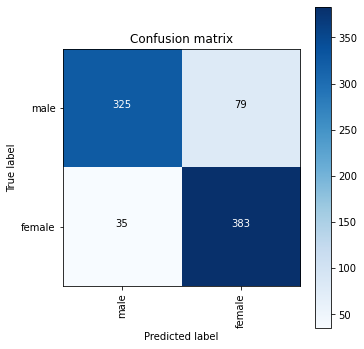

f2 => 
              precision    recall  f1-score   support

        male       0.93      0.87      0.90       404
      female       0.88      0.93      0.91       418

    accuracy                           0.90       822
   macro avg       0.90      0.90      0.90       822
weighted avg       0.90      0.90      0.90       822




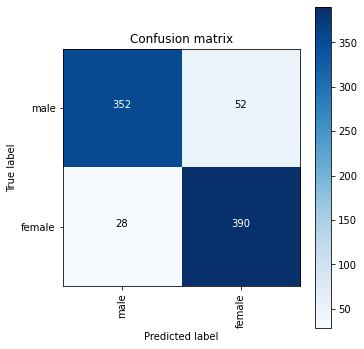

f3 => 
              precision    recall  f1-score   support

        male       0.86      0.89      0.88       404
      female       0.89      0.86      0.88       418

    accuracy                           0.88       822
   macro avg       0.88      0.88      0.88       822
weighted avg       0.88      0.88      0.88       822




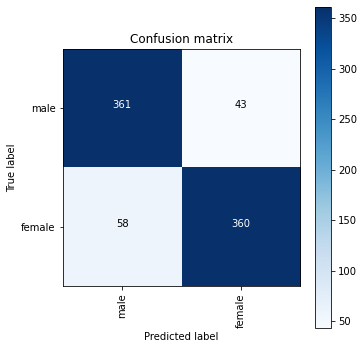

f4 => 
              precision    recall  f1-score   support

        male       0.57      0.70      0.63       404
      female       0.63      0.49      0.55       418

    accuracy                           0.59       822
   macro avg       0.60      0.59      0.59       822
weighted avg       0.60      0.59      0.59       822




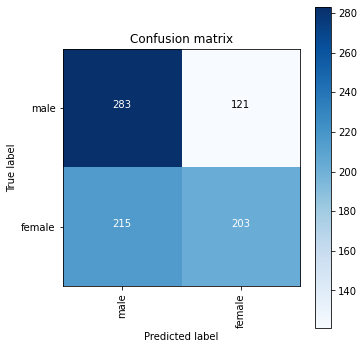

f5 => 
              precision    recall  f1-score   support

        male       0.58      0.79      0.67       404
      female       0.68      0.44      0.53       418

    accuracy                           0.61       822
   macro avg       0.63      0.61      0.60       822
weighted avg       0.63      0.61      0.60       822




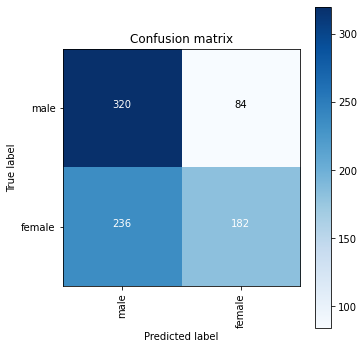

In [76]:
a4=[]
target_names = ['male', 'female']
classifier = GaussianNB()
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(f_final[i], final_pd.loc[:,"Gender"].values, test_size = 0.25, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    classes = list(dict.fromkeys(final_pd['Gender']))
    print("f{} => \n{}\n".format(i+1,classification_report(y_test, y_pred, target_names=target_names)))
    plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes)
    a4.append(accuracy_score(y_test, y_pred))
   

#### Final result

In [479]:
acc4 = pd.DataFrame({"column1": ["f1", "f2", "f3", "f4","f5"], "column2":a4 })
acc4.sort_values("column2",ascending=False)

,column1,column2
1,f2,0.902676
2,f3,0.877129
0,f1,0.861314
4,f5,0.610706
3,f4,0.591241


### Decision Tree Classification(Estimating Gender column)

f1 => 
              precision    recall  f1-score   support

        male       0.92      0.85      0.88       404
      female       0.87      0.92      0.89       418

    accuracy                           0.89       822
   macro avg       0.89      0.89      0.89       822
weighted avg       0.89      0.89      0.89       822




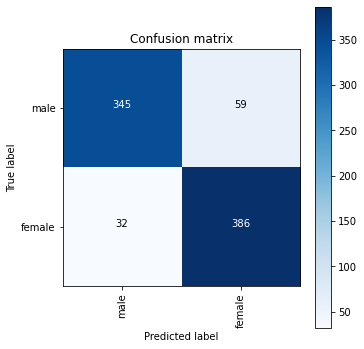

f2 => 
              precision    recall  f1-score   support

        male       0.92      0.90      0.91       404
      female       0.91      0.93      0.92       418

    accuracy                           0.91       822
   macro avg       0.91      0.91      0.91       822
weighted avg       0.91      0.91      0.91       822




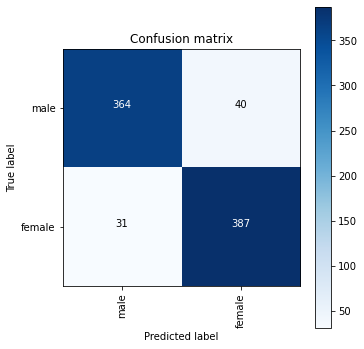

f3 => 
              precision    recall  f1-score   support

        male       0.92      0.91      0.91       404
      female       0.92      0.92      0.92       418

    accuracy                           0.92       822
   macro avg       0.92      0.92      0.92       822
weighted avg       0.92      0.92      0.92       822




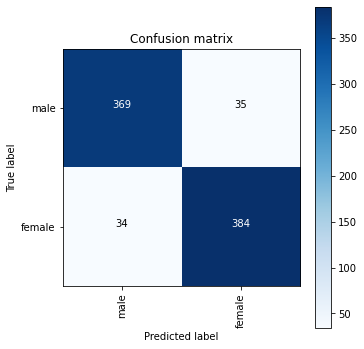

f4 => 
              precision    recall  f1-score   support

        male       0.73      0.85      0.79       404
      female       0.83      0.70      0.76       418

    accuracy                           0.77       822
   macro avg       0.78      0.77      0.77       822
weighted avg       0.78      0.77      0.77       822




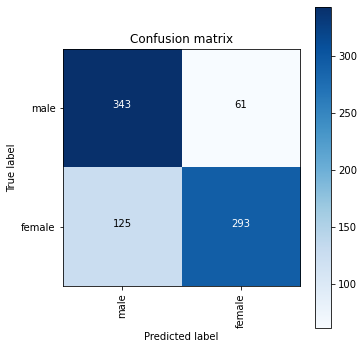

f5 => 
              precision    recall  f1-score   support

        male       0.64      0.90      0.75       404
      female       0.84      0.51      0.64       418

    accuracy                           0.70       822
   macro avg       0.74      0.70      0.69       822
weighted avg       0.74      0.70      0.69       822




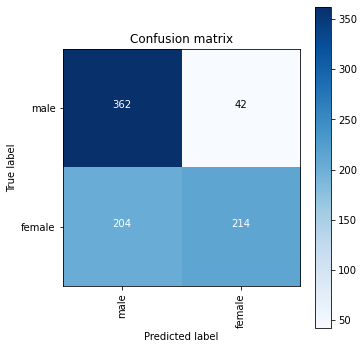

In [77]:
a5=[]
target_names = ['male', 'female']
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(f_final[i], final_pd.loc[:,"Gender"].values, test_size = 0.25, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    classes = list(dict.fromkeys(final_pd['Gender']))
    print("f{} => \n{}\n".format(i+1,classification_report(y_test, y_pred, target_names=target_names)))
    plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes)
    a5.append(accuracy_score(y_test, y_pred))
  

#### Final result

In [481]:
acc5 = pd.DataFrame({"column1": ["f1", "f2", "f3", "f4","f5"], "column2":a5})
acc5.sort_values("column2",ascending=False)

,column1,column2
2,f3,0.916058
1,f2,0.913625
0,f1,0.889294
3,f4,0.773723
4,f5,0.700730


### Random Forest Classification(Estimating Gender column)

f1 => 
              precision    recall  f1-score   support

        male       0.93      0.88      0.90       404
      female       0.89      0.93      0.91       418

    accuracy                           0.91       822
   macro avg       0.91      0.91      0.91       822
weighted avg       0.91      0.91      0.91       822




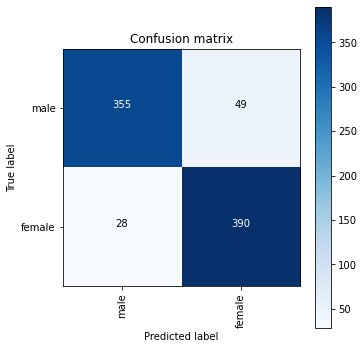

f2 => 
              precision    recall  f1-score   support

        male       0.93      0.88      0.91       404
      female       0.89      0.94      0.91       418

    accuracy                           0.91       822
   macro avg       0.91      0.91      0.91       822
weighted avg       0.91      0.91      0.91       822




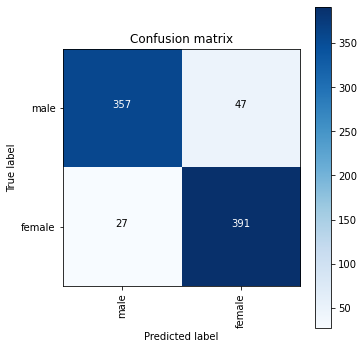

f3 => 
              precision    recall  f1-score   support

        male       0.91      0.90      0.91       404
      female       0.90      0.92      0.91       418

    accuracy                           0.91       822
   macro avg       0.91      0.91      0.91       822
weighted avg       0.91      0.91      0.91       822




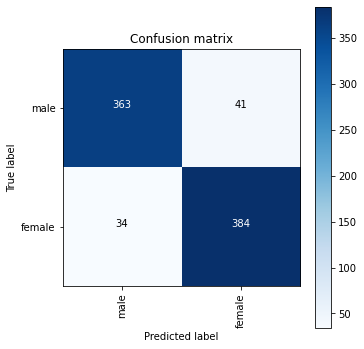

f4 => 
              precision    recall  f1-score   support

        male       0.76      0.83      0.79       404
      female       0.82      0.74      0.78       418

    accuracy                           0.78       822
   macro avg       0.79      0.79      0.78       822
weighted avg       0.79      0.78      0.78       822




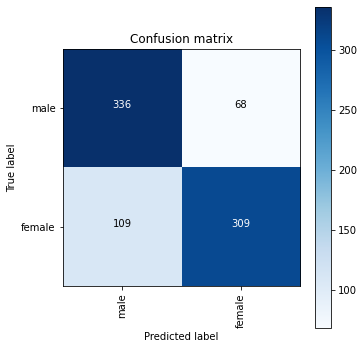

f5 => 
              precision    recall  f1-score   support

        male       0.65      0.91      0.76       404
      female       0.86      0.53      0.65       418

    accuracy                           0.72       822
   macro avg       0.76      0.72      0.71       822
weighted avg       0.76      0.72      0.71       822




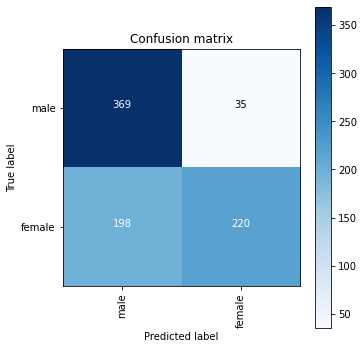

In [78]:
a6=[]
target_names = ['male', 'female']
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(f_final[i], final_pd.loc[:,"Gender"].values, test_size = 0.25, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    classes = list(dict.fromkeys(final_pd['Gender']))
    print("f{} => \n{}\n".format(i+1,classification_report(y_test, y_pred, target_names=target_names)))
    plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes)
    a6.append(accuracy_score(y_test, y_pred))
    

#### Final result

In [483]:
acc6 = pd.DataFrame({"column1": ["f1", "f2", "f3", "f4","f5"], "column2":a6})
acc6.sort_values("column2",ascending=False)

,column1,column2
1,f2,0.909976
2,f3,0.908759
0,f1,0.906326
3,f4,0.784672
4,f5,0.716545


### Summary of Classification the Gender Label

In [484]:
final_acc=pd.DataFrame({"feature": ["f1", "f2", "f3", "f4","f5"], "KNN":a1 , "SVM":a2 ,"K_SVM":a3 ,"NB":a4,"DT":a5,"RF":a6})

In [485]:
final_acc=final_acc.sort_values("SVM",ascending=False).reset_index(drop=True)
final_acc

,feature,KNN,SVM,K_SVM,NB,DT,RF
0,f3,0.923358,0.944039,0.945255,0.877129,0.916058,0.908759
1,f2,0.923358,0.931873,0.940389,0.902676,0.913625,0.909976
2,f1,0.884428,0.880779,0.913625,0.861314,0.889294,0.906326
3,f4,0.692214,0.613139,0.714112,0.591241,0.773723,0.784672
4,f5,0.625304,0.608273,0.642336,0.610706,0.700730,0.716545


## Status Label

### KNN( Estimating Status column)

f1 => 
              precision    recall  f1-score   support

           H       0.43      0.51      0.47       271
           S       0.39      0.49      0.44       300
           N       0.42      0.21      0.28       251

    accuracy                           0.41       822
   macro avg       0.42      0.40      0.39       822
weighted avg       0.41      0.41      0.40       822




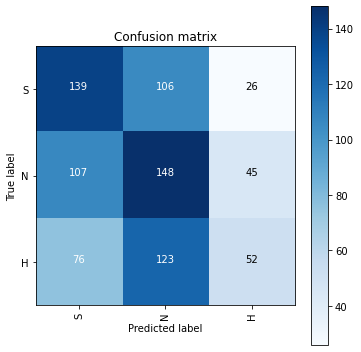

f2 => 
              precision    recall  f1-score   support

           H       0.40      0.46      0.43       271
           S       0.39      0.44      0.41       300
           N       0.46      0.31      0.37       251

    accuracy                           0.41       822
   macro avg       0.42      0.41      0.40       822
weighted avg       0.41      0.41      0.41       822




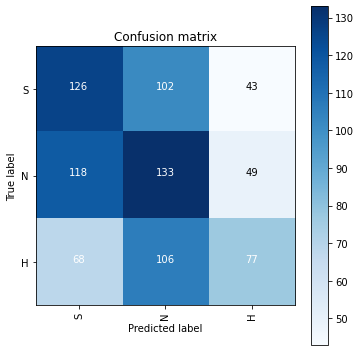

f3 => 
              precision    recall  f1-score   support

           H       0.38      0.49      0.43       271
           S       0.39      0.42      0.40       300
           N       0.45      0.27      0.34       251

    accuracy                           0.40       822
   macro avg       0.41      0.39      0.39       822
weighted avg       0.40      0.40      0.39       822




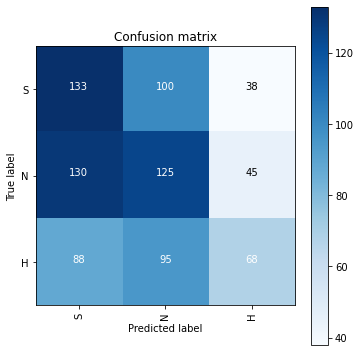

f4 => 
              precision    recall  f1-score   support

           H       0.43      0.58      0.50       271
           S       0.45      0.38      0.41       300
           N       0.39      0.32      0.35       251

    accuracy                           0.43       822
   macro avg       0.42      0.43      0.42       822
weighted avg       0.43      0.43      0.42       822




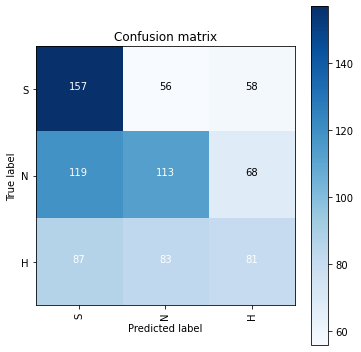

f5 => 
              precision    recall  f1-score   support

           H       0.34      0.62      0.44       271
           S       0.43      0.25      0.32       300
           N       0.29      0.18      0.22       251

    accuracy                           0.35       822
   macro avg       0.35      0.35      0.33       822
weighted avg       0.36      0.35      0.33       822




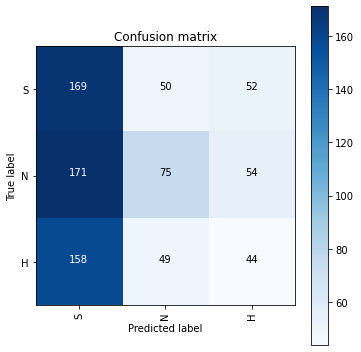

In [79]:
a1=[]
target_names = ['H', 'S', 'N']
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(f_final[i], final_pd.loc[:,"Status"].values, test_size = 0.25, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    classes = list(dict.fromkeys(final_pd['Status']))
    print("f{} => \n{}\n".format(i+1,classification_report(y_test, y_pred, target_names=target_names)))
    plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes)
    a1.append(accuracy_score(y_test, y_pred))
  

#### Final result

In [487]:
acc1 = pd.DataFrame({"column1": ["f1", "f2", "f3", "f4","f5"], "column2":a1})
acc1.sort_values("column2",ascending=False)

,column1,column2
3,f4,0.427007
0,f1,0.412409
1,f2,0.408759
2,f3,0.396594
4,f5,0.350365


### Support_vector_Machine( Estimating Status column)

f1 => 
              precision    recall  f1-score   support

           H       0.44      0.61      0.51       271
           S       0.42      0.25      0.32       300
           N       0.36      0.38      0.37       251

    accuracy                           0.41       822
   macro avg       0.41      0.41      0.40       822
weighted avg       0.41      0.41      0.40       822




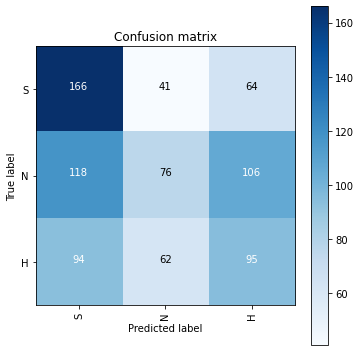

f2 => 
              precision    recall  f1-score   support

           H       0.52      0.55      0.53       271
           S       0.46      0.44      0.45       300
           N       0.52      0.50      0.51       251

    accuracy                           0.50       822
   macro avg       0.50      0.50      0.50       822
weighted avg       0.50      0.50      0.50       822




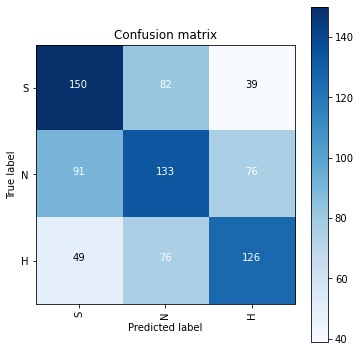

f3 => 
              precision    recall  f1-score   support

           H       0.50      0.50      0.50       271
           S       0.43      0.45      0.44       300
           N       0.47      0.43      0.45       251

    accuracy                           0.46       822
   macro avg       0.47      0.46      0.46       822
weighted avg       0.46      0.46      0.46       822




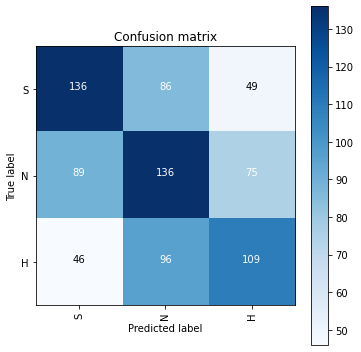

f4 => 
              precision    recall  f1-score   support

           H       0.38      0.56      0.45       271
           S       0.42      0.26      0.32       300
           N       0.35      0.33      0.34       251

    accuracy                           0.38       822
   macro avg       0.38      0.38      0.37       822
weighted avg       0.39      0.38      0.37       822




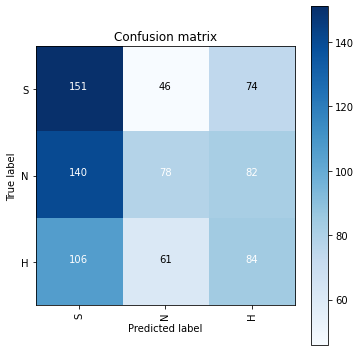

f5 => 
              precision    recall  f1-score   support

           H       0.32      0.72      0.44       271
           S       0.37      0.15      0.21       300
           N       0.29      0.11      0.16       251

    accuracy                           0.32       822
   macro avg       0.33      0.33      0.27       822
weighted avg       0.33      0.32      0.27       822




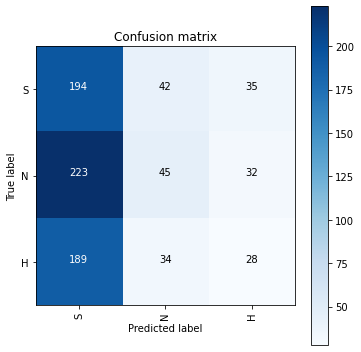

In [80]:
a2=[]
target_names = ['H', 'S', 'N']
classifier = SVC(kernel = 'linear', random_state = 0)
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(f_final[i], final_pd.loc[:,"Status"].values, test_size = 0.25, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    classes = list(dict.fromkeys(final_pd['Status']))
    print("f{} => \n{}\n".format(i+1,classification_report(y_test, y_pred, target_names=target_names)))
    plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes)
    a2.append(accuracy_score(y_test, y_pred))
   

#### Final result

In [489]:
acc2 = pd.DataFrame({"column1": ["f1", "f2", "f3", "f4","f5"], "column2":a2})
acc2.sort_values("column2",ascending=False)

,column1,column2
1,f2,0.497567
2,f3,0.463504
0,f1,0.409976
3,f4,0.380779
4,f5,0.324818


### Kernel_Support_vector_Machine( Estimating Status column)

f1 => 
              precision    recall  f1-score   support

           H       0.47      0.67      0.55       271
           S       0.51      0.38      0.43       300
           N       0.50      0.43      0.46       251

    accuracy                           0.49       822
   macro avg       0.49      0.49      0.48       822
weighted avg       0.50      0.49      0.48       822




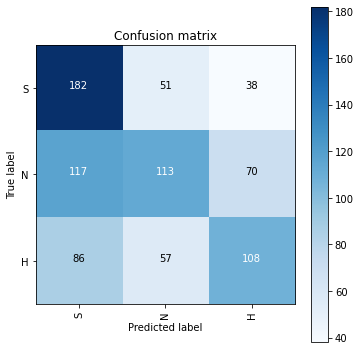

f2 => 
              precision    recall  f1-score   support

           H       0.58      0.61      0.59       271
           S       0.54      0.38      0.44       300
           N       0.48      0.62      0.54       251

    accuracy                           0.53       822
   macro avg       0.53      0.53      0.52       822
weighted avg       0.53      0.53      0.52       822




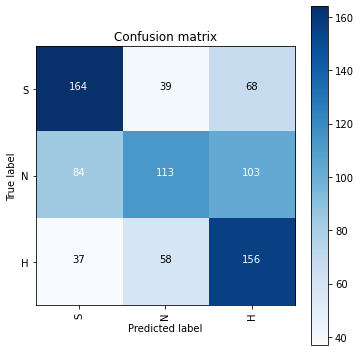

f3 => 
              precision    recall  f1-score   support

           H       0.51      0.56      0.53       271
           S       0.53      0.34      0.41       300
           N       0.46      0.61      0.52       251

    accuracy                           0.49       822
   macro avg       0.50      0.50      0.49       822
weighted avg       0.50      0.49      0.49       822




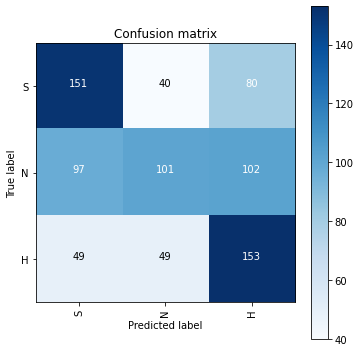

f4 => 
              precision    recall  f1-score   support

           H       0.41      0.52      0.46       271
           S       0.41      0.22      0.28       300
           N       0.36      0.46      0.40       251

    accuracy                           0.39       822
   macro avg       0.39      0.40      0.38       822
weighted avg       0.40      0.39      0.38       822




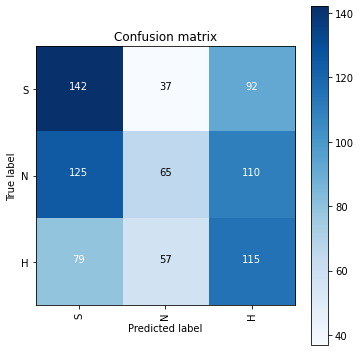

f5 => 
              precision    recall  f1-score   support

           H       0.31      0.60      0.41       271
           S       0.41      0.12      0.18       300
           N       0.26      0.23      0.25       251

    accuracy                           0.31       822
   macro avg       0.33      0.32      0.28       822
weighted avg       0.33      0.31      0.28       822




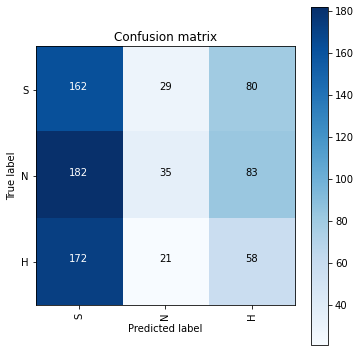

In [81]:
a3=[]
target_names = ['H', 'S', 'N']
classifier = SVC(kernel = 'rbf', random_state = 0)
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(f_final[i], final_pd.loc[:,"Status"].values, test_size = 0.25, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    classes = list(dict.fromkeys(final_pd['Status']))
    print("f{} => \n{}\n".format(i+1,classification_report(y_test, y_pred, target_names=target_names)))
    plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes)
    a3.append(accuracy_score(y_test, y_pred))


#### Final result

In [491]:
acc3 = pd.DataFrame({"column1": ["f1", "f2", "f3", "f4","f5"], "column2":a3})
acc3.sort_values("column2",ascending=False)

,column1,column2
1,f2,0.526764
2,f3,0.492701
0,f1,0.490268
3,f4,0.391727
4,f5,0.310219


#### Naive Bayes(Estimating Status column)

f1 => 
              precision    recall  f1-score   support

           H       0.40      0.54      0.46       271
           S       0.43      0.27      0.33       300
           N       0.39      0.41      0.40       251

    accuracy                           0.40       822
   macro avg       0.41      0.41      0.40       822
weighted avg       0.41      0.40      0.40       822




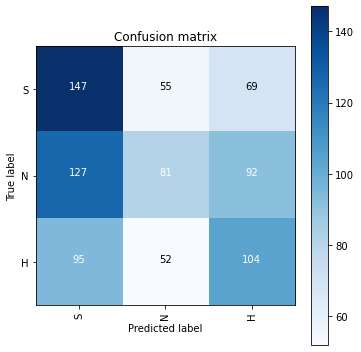

f2 => 
              precision    recall  f1-score   support

           H       0.48      0.45      0.46       271
           S       0.43      0.49      0.46       300
           N       0.45      0.40      0.42       251

    accuracy                           0.45       822
   macro avg       0.45      0.45      0.45       822
weighted avg       0.45      0.45      0.45       822




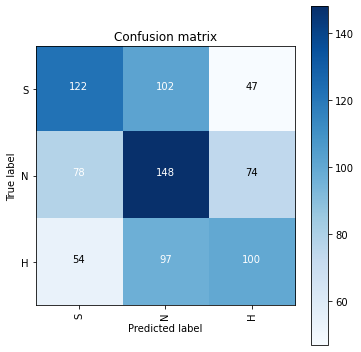

f3 => 
              precision    recall  f1-score   support

           H       0.46      0.48      0.47       271
           S       0.43      0.44      0.43       300
           N       0.45      0.41      0.43       251

    accuracy                           0.44       822
   macro avg       0.44      0.44      0.44       822
weighted avg       0.44      0.44      0.44       822




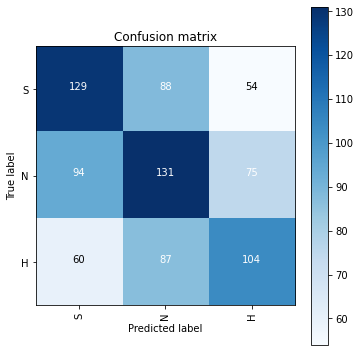

f4 => 
              precision    recall  f1-score   support

           H       0.41      0.45      0.43       271
           S       0.37      0.33      0.35       300
           N       0.30      0.30      0.30       251

    accuracy                           0.36       822
   macro avg       0.36      0.36      0.36       822
weighted avg       0.36      0.36      0.36       822




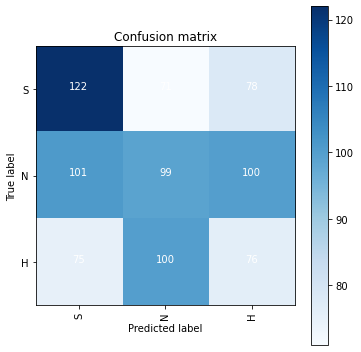

f5 => 
              precision    recall  f1-score   support

           H       0.31      0.26      0.28       271
           S       0.38      0.50      0.43       300
           N       0.30      0.25      0.27       251

    accuracy                           0.34       822
   macro avg       0.33      0.34      0.33       822
weighted avg       0.33      0.34      0.33       822




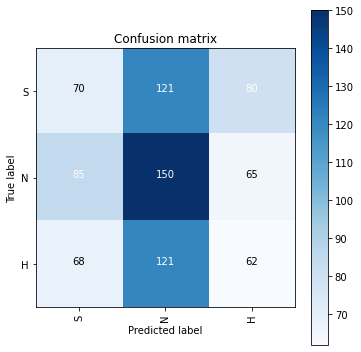

In [82]:
a4=[]
target_names = ['H', 'S', 'N']
classifier = GaussianNB()
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(f_final[i], final_pd.loc[:,"Status"].values, test_size = 0.25, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    classes = list(dict.fromkeys(final_pd['Status']))
    print("f{} => \n{}\n".format(i+1,classification_report(y_test, y_pred, target_names=target_names)))
    plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes)
    a4.append(accuracy_score(y_test, y_pred))
    

In [493]:
acc4 = pd.DataFrame({"column1": ["f1", "f2", "f3", "f4","f5"], "column2":a4})
acc4.sort_values("column2",ascending=False)

,column1,column2
1,f2,0.450122
2,f3,0.442822
0,f1,0.403893
3,f4,0.361314
4,f5,0.343066


#### Decision Tree Classification(Estimating Status column)

f1 => 
              precision    recall  f1-score   support

           H       0.54      0.70      0.61       271
           S       0.63      0.53      0.57       300
           N       0.60      0.53      0.56       251

    accuracy                           0.58       822
   macro avg       0.59      0.58      0.58       822
weighted avg       0.59      0.58      0.58       822




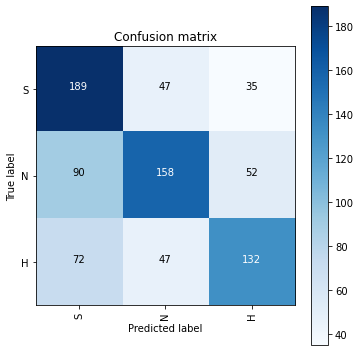

f2 => 
              precision    recall  f1-score   support

           H       0.63      0.58      0.60       271
           S       0.61      0.55      0.58       300
           N       0.53      0.63      0.58       251

    accuracy                           0.59       822
   macro avg       0.59      0.59      0.59       822
weighted avg       0.59      0.59      0.59       822




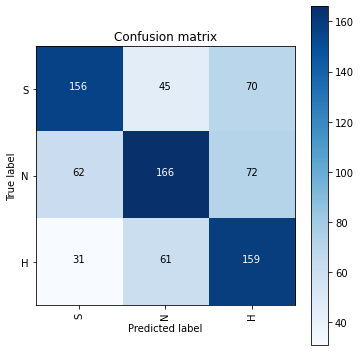

f3 => 
              precision    recall  f1-score   support

           H       0.60      0.55      0.58       271
           S       0.60      0.53      0.56       300
           N       0.51      0.62      0.56       251

    accuracy                           0.57       822
   macro avg       0.57      0.57      0.57       822
weighted avg       0.57      0.57      0.57       822




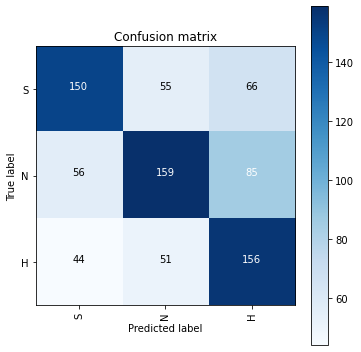

f4 => 
              precision    recall  f1-score   support

           H       0.55      0.59      0.57       271
           S       0.60      0.57      0.58       300
           N       0.55      0.55      0.55       251

    accuracy                           0.57       822
   macro avg       0.57      0.57      0.57       822
weighted avg       0.57      0.57      0.57       822




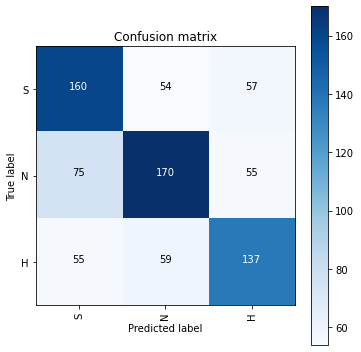

f5 => 
              precision    recall  f1-score   support

           H       0.39      0.70      0.50       271
           S       0.55      0.33      0.41       300
           N       0.42      0.27      0.33       251

    accuracy                           0.43       822
   macro avg       0.46      0.43      0.42       822
weighted avg       0.46      0.43      0.42       822




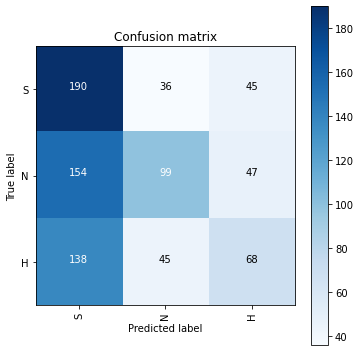

In [83]:
a5=[]
target_names = ['H', 'S', 'N']
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(f_final[i], final_pd.loc[:,"Status"].values, test_size = 0.25, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    classes = list(dict.fromkeys(final_pd['Status']))
    print("f{} => \n{}\n".format(i+1,classification_report(y_test, y_pred, target_names=target_names)))
    plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes)
    a5.append(accuracy_score(y_test, y_pred))
    

#### Final result

In [495]:
acc5 = pd.DataFrame({"column1": ["f1", "f2", "f3", "f4","f5"], "column2":a5})
acc5.sort_values("column2",ascending=False)

,column1,column2
1,f2,0.585158
0,f1,0.582725
3,f4,0.568127
2,f3,0.565693
4,f5,0.434307


#### Random Forest Classification(Estimating Status column)

f1 => 
              precision    recall  f1-score   support

           H       0.51      0.67      0.58       271
           S       0.57      0.49      0.53       300
           N       0.56      0.46      0.50       251

    accuracy                           0.54       822
   macro avg       0.55      0.54      0.54       822
weighted avg       0.55      0.54      0.54       822




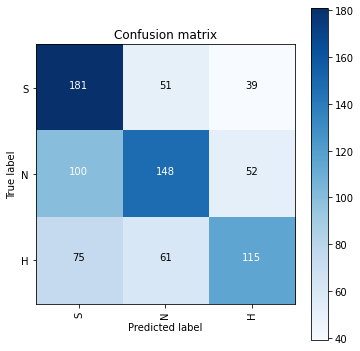

f2 => 
              precision    recall  f1-score   support

           H       0.57      0.61      0.59       271
           S       0.63      0.54      0.58       300
           N       0.53      0.58      0.56       251

    accuracy                           0.58       822
   macro avg       0.58      0.58      0.58       822
weighted avg       0.58      0.58      0.58       822




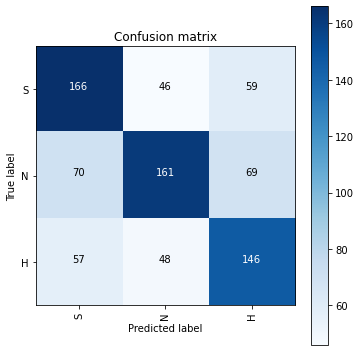

f3 => 
              precision    recall  f1-score   support

           H       0.60      0.56      0.58       271
           S       0.61      0.55      0.58       300
           N       0.49      0.58      0.53       251

    accuracy                           0.56       822
   macro avg       0.57      0.56      0.56       822
weighted avg       0.57      0.56      0.56       822




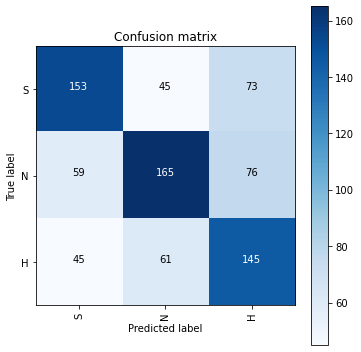

f4 => 
              precision    recall  f1-score   support

           H       0.55      0.61      0.58       271
           S       0.56      0.52      0.54       300
           N       0.53      0.51      0.52       251

    accuracy                           0.55       822
   macro avg       0.55      0.55      0.54       822
weighted avg       0.55      0.55      0.55       822




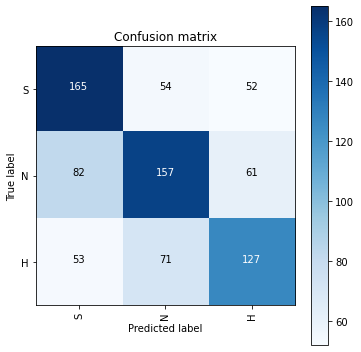

f5 => 
              precision    recall  f1-score   support

           H       0.40      0.73      0.52       271
           S       0.60      0.35      0.44       300
           N       0.45      0.27      0.34       251

    accuracy                           0.45       822
   macro avg       0.48      0.45      0.43       822
weighted avg       0.49      0.45      0.44       822




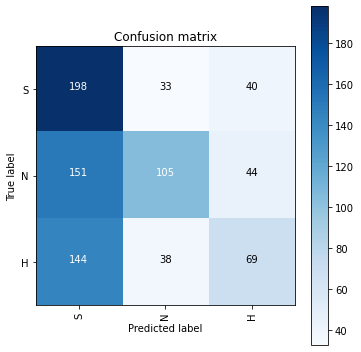

In [84]:
a6=[]
target_names = ['H', 'S', 'N']
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(f_final[i], final_pd.loc[:,"Status"].values, test_size = 0.25, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    classes = list(dict.fromkeys(final_pd['Status']))
    print("f{} => \n{}\n".format(i+1,classification_report(y_test, y_pred, target_names=target_names)))
    plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes)
    a6.append(accuracy_score(y_test, y_pred))


#### Final result

In [497]:
acc6 = pd.DataFrame({"column1": ["f1", "f2", "f3", "f4","f5"], "column2":a6})
acc6.sort_values("column2",ascending=False)

,column1,column2
1,f2,0.575426
2,f3,0.563260
3,f4,0.546229
0,f1,0.540146
4,f5,0.452555


### Summary of Classification the Status Label

In [498]:
final_acc=pd.DataFrame({"feature": ["f1", "f2", "f3", "f4","f5"], "KNN":a1 , "SVM":a2 ,"K_SVM":a3 ,"NB":a4,"DT":a5,"RF":a6})
final_acc=final_acc.sort_values("SVM",ascending=False).reset_index(drop=True)
final_acc

,feature,KNN,SVM,K_SVM,NB,DT,RF
0,f2,0.408759,0.497567,0.526764,0.450122,0.585158,0.575426
1,f3,0.396594,0.463504,0.492701,0.442822,0.565693,0.563260
2,f1,0.412409,0.409976,0.490268,0.403893,0.582725,0.540146
3,f4,0.427007,0.380779,0.391727,0.361314,0.568127,0.546229
4,f5,0.350365,0.324818,0.310219,0.343066,0.434307,0.452555


# Simple Linear Regression(Age column)

In [499]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [500]:
mse=[]
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(f_final[i], final_pd.loc[:,"Age"].values, test_size = 0.25, random_state = 0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    classes = list(dict.fromkeys(final_pd['Age']))
    mse.append(mean_squared_error(y_test, y_pred))
    print("f{} MSE is : {}\n".format(i+1,mean_squared_error(y_test, y_pred)))
    

f1 MSE is : 0.017240455617756712

f2 MSE is : 0.010456170413864077

f3 MSE is : 0.009982742513663883

f4 MSE is : 0.030166718994366997

f5 MSE is : 0.03179490158004619



#### Final result

In [501]:
MSE = pd.DataFrame({"column1": ["f1", "f2", "f3", "f4","f5"], "column2":mse})
MSE.sort_values("column2",ascending=False).reset_index(drop=True)

,column1,column2
0,f5,0.031795
1,f4,0.030167
2,f1,0.017240
3,f2,0.010456
4,f3,0.009983
